In [133]:
import pandas as pd
import numpy as np

In [2]:
dados=pd.read_csv('dados.csv')
dados.head(15)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


Qualitativas ordinais

In [3]:
sorted(dados['Anos de Estudo'].unique()) #método para mostrar as variáveis ordinais de maneira ordenada

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Qualitativa nominais

In [4]:
sorted(dados['Sexo'].unique())

[0, 1]

In [5]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

Quantitativa discreta

In [6]:
min_idade=dados.Idade.min()

In [7]:
max_idade=dados.Idade.max()

In [8]:
print(f'A idade mínima é {min_idade} anos\n',
      f'\nA idade máxima é {max_idade} anos')

A idade mínima é 13 anos
 
A idade máxima é 99 anos


Quantitativa contínua

In [9]:
altura_min=dados.Altura.min()
altura_max=dados.Altura.max()
print(f'A altura mínima é {altura_min} metros\n',
      f'\nA altura máxima é {altura_max} metros')

A altura mínima é 1.339244614 metros
 
A altura máxima é 2.028496765 metros


In [10]:
dados['Sexo'].value_counts()

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [11]:
dados['Sexo'].value_counts(normalize=True)*100

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [12]:
frequencia=dados['Sexo'].value_counts()

In [13]:
percentual=dados['Sexo'].value_counts(normalize=True)*100

In [14]:
dist_freq_qual=pd.DataFrame({'Frequência':frequencia,'Porcentagem(%)':percentual})
dist_freq_qual

,Frequência,Porcentagem(%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [15]:
dist_freq_qual.rename(index={0:'Masculino',1:'Feminino'}, inplace=True)
dist_freq_qual.rename_axis('Sexo', axis='columns',inplace=True)
dist_freq_qual

Sexo,Frequência,Porcentagem(%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [16]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [17]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [18]:
frequencia.rename(index=sexo,inplace=True)
frequencia.rename(columns=cor,inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
percentual_freq=pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize=True)*100
percentual_freq.rename(index=sexo,inplace=True)
percentual_freq.rename(columns=cor,inplace=True)
percentual_freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [20]:
renda_cor=pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc='mean',
                         values=dados.Renda)
renda_cor.rename(index=sexo,inplace=True)
renda_cor.rename(columns=cor,inplace=True)
renda_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [21]:
dados.Renda.min()

0

In [22]:
dados.Renda.max()

200000

In [23]:
classes=[0,1576,3152,7880,15760, 200000]

In [24]:
labels=['E','D','C','B','A']

Estudar o método CUT do Pandas

In [25]:
frequencia_renda=pd.value_counts(pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True))

In [26]:
percentual_renda=pd.value_counts(pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True),
       normalize=True)*100

In [27]:
distribuicao_renda_classe=pd.DataFrame({'Frequência':frequencia_renda,'Percentual':percentual_renda})

In [28]:
distribuicao_renda_classe.sort_index(ascending=False)

,Frequência,Percentual
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


Exercício proposto

In [29]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


In [30]:
import numpy as np

In [31]:
n=dados.shape[0]
n

76840

Regra de Sturges - definindo o número de classes

In [32]:
k=1+(10/3)*np.log10(n)
int(k)

17

In [33]:
frequencia_de_rendas=pd.value_counts(
    pd.cut(
        x=dados.Renda,
        bins=17,
        include_lowest=True
    ),
    sort=False #o padrão vem True, mas para ver de maneira lógica mudamos para False
)

In [34]:
percentual_de_rendas=pd.value_counts(
    pd.cut(
        x=dados.Renda,
        bins=17,
        include_lowest=True
    ),
    sort=False, #o padrão vem True, mas para ver de maneira lógica mudamos para False
     normalize=True 
)*100

In [35]:
dataframe_da_renda=pd.DataFrame(
    {'Frequência':frequencia_de_rendas,
     'Porcentagem (%)':percentual_de_rendas}
)

dataframe_da_renda

,Frequência,Porcentagem (%)
Renda,,
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


Histogramas

In [36]:
import seaborn as sns

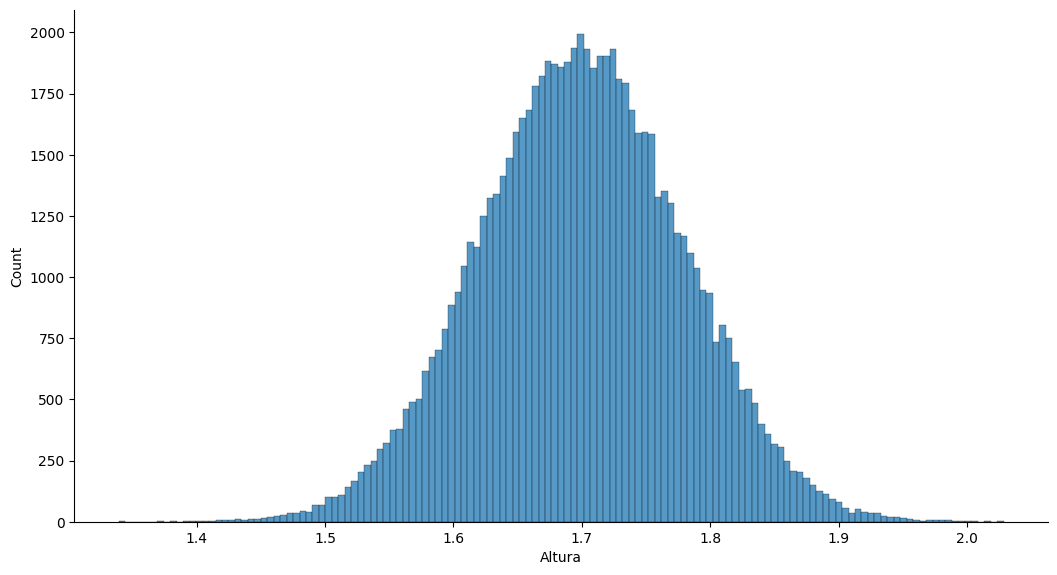

In [37]:
ax = sns.displot(dados.Altura, kde=False)

ax.figure.set_size_inches(12,6)
#ax.set_title('Distribuição de Frequência', fontsize=18)
#ax.set_xlabel('Altura (metros)',fontsize=14)
ax

<Axes: >

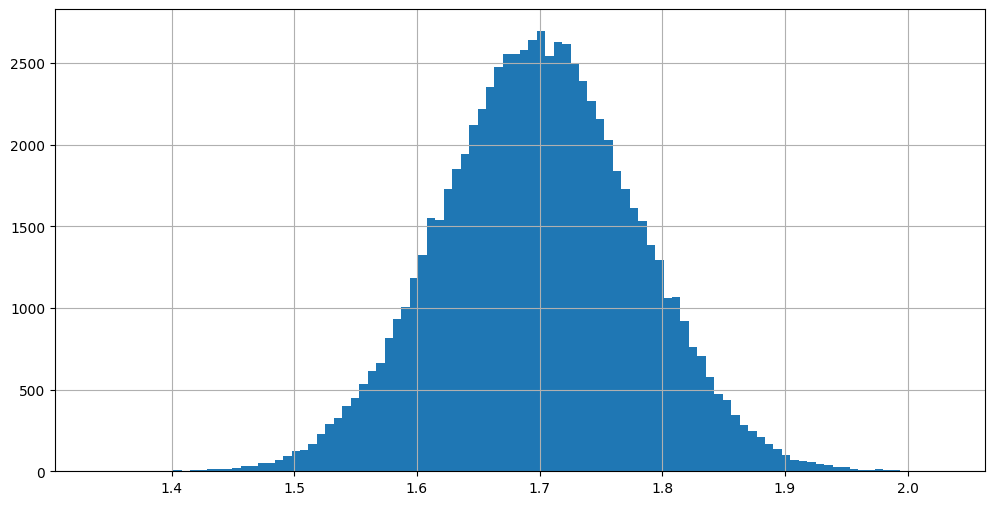

In [38]:
dados.Altura.hist(bins=100,figsize=(12,6))

In [39]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [40]:
a=df.Fulano.mean()
b=df.Beltrano.mean()
c=df.Sicrano.mean()
print(a,b,c)

7.714285714285714 5.142857142857143 7.714285714285714


In [42]:
dados.groupby(['Sexo'])['Renda'].mean() #cálculo da média

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

Exercício proposto

In [43]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [44]:
dataset.groupby(['Sexo'])['Idade'].mean()

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

In [45]:
dataset.Idade.mean()

46.1

In [46]:
notas_fulano=df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [47]:
notas_fulano=notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [50]:
print(notas_fulano.median(),notas_fulano.mean())

8.0 7.714285714285714


In [51]:
dados.Renda.median()

1200.0

In [52]:
dados.Renda.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

In [53]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


Moda é o valor de maior frequência, se 2 números tiverem mesma frequência é dito bimodal e mais que isto é multi-modal

In [55]:
df.mode() #determinando a moda das medidas

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [57]:
dados.Renda.mode() #A moda do salário das pessoas é o salário mínimo

0    788
Name: Renda, dtype: int64

In [58]:
dados.Altura.describe()

count    76840.000000
mean         1.699512
std          0.079717
min          1.339245
25%          1.645785
50%          1.699325
75%          1.753062
max          2.028497
Name: Altura, dtype: float64

In [59]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

Relação entre média, mediana e moda

/var/folders/1m/rncwt49n2pgf0m33c9wfrw7w0000gn/T/ipykernel_3956/1462878452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Renda)


NameError: name 'figure' is not defined

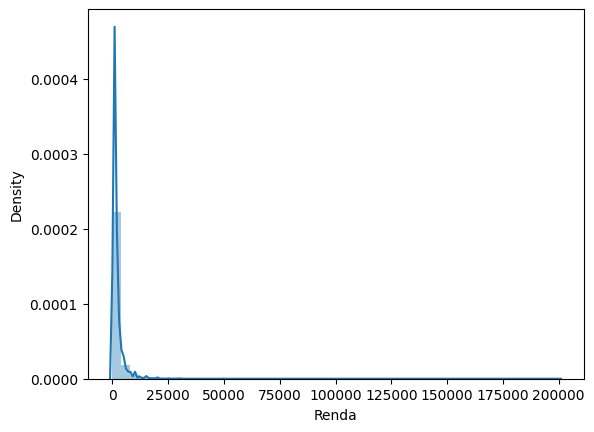

In [60]:
ax = sns.distplot(dados.Renda)
ax = figure.set_size_inches(12, 6)
ax

/var/folders/1m/rncwt49n2pgf0m33c9wfrw7w0000gn/T/ipykernel_3956/2591294308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

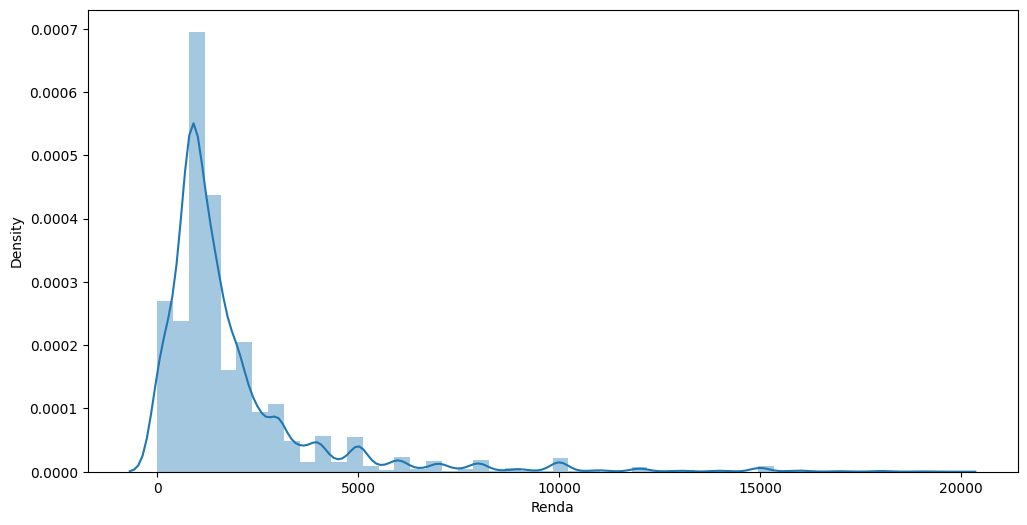

In [61]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [62]:
Moda = dados.Renda.mode()[0]
Moda

788

In [63]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [64]:
Media = dados.Renda.mean()
Media

2000.3831988547631

/var/folders/1m/rncwt49n2pgf0m33c9wfrw7w0000gn/T/ipykernel_3956/3762387715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


NameError: name 'figure' is not defined

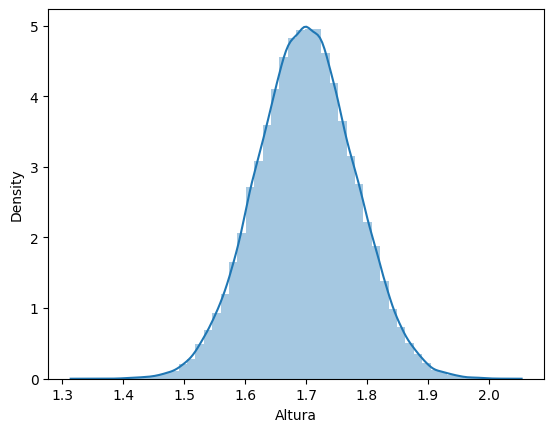

In [65]:
ax = sns.distplot(dados.Altura)
ax = figure.set_size_inches(12, 6)
ax

In [66]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [67]:
Moda = dados.Altura.median()
Moda

1.6993247325

In [68]:
Moda = dados.Altura.mean()
Moda

1.6995124540575741

Medidas separatrizes

In [78]:
dados.Renda.quantile([0.25,0.50,0.75]) #tem de estar dentro de uma lista/quartis

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [73]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [74]:
dados.Renda.quantile([i/10 for i in range(1,10)]) #decis

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [76]:
dados.Renda.quantile([i/100 for i in range(1,100)]) #centis

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

/var/folders/1m/rncwt49n2pgf0m33c9wfrw7w0000gn/T/ipykernel_3956/2201655259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade,


AttributeError: 'tuple' object has no attribute 'figure'

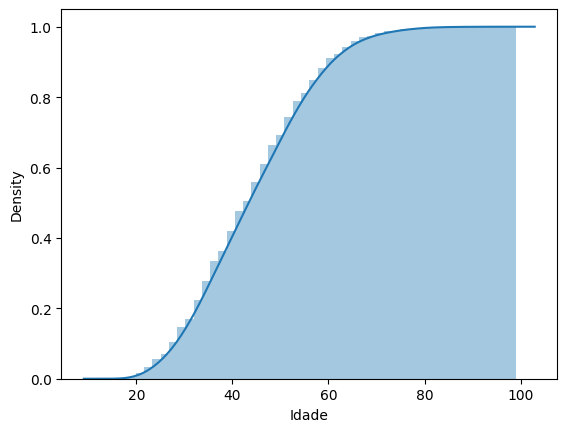

In [77]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True}),
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

Criando boxplot

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

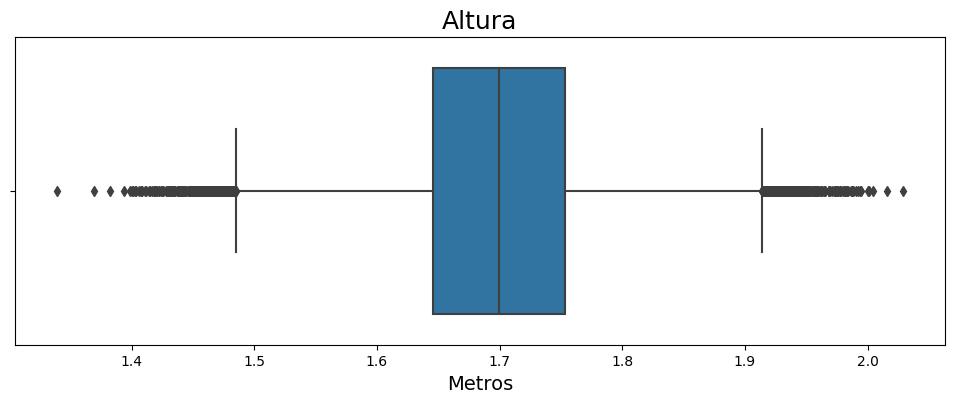

In [79]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

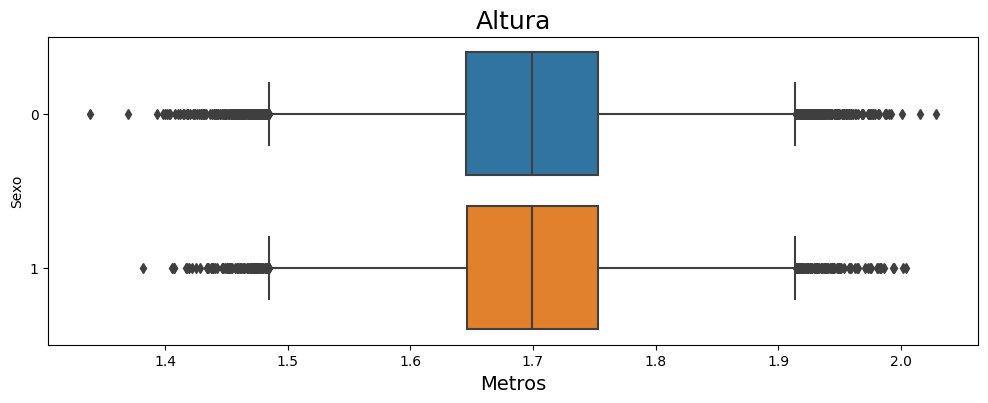

In [80]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

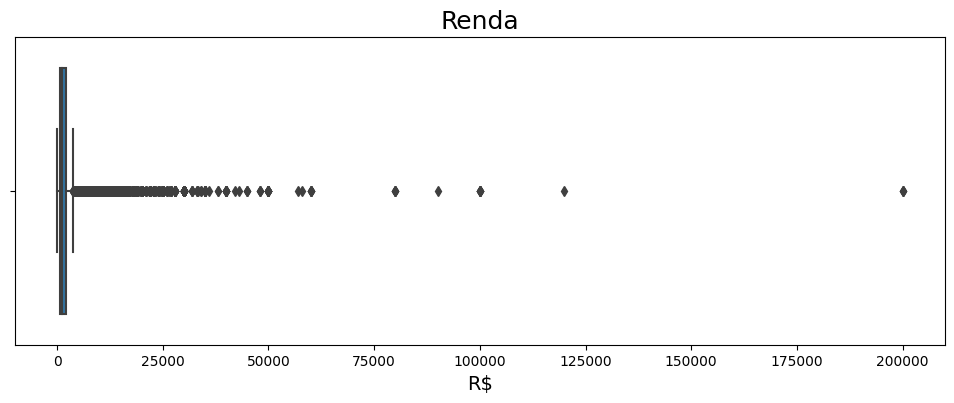

In [81]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

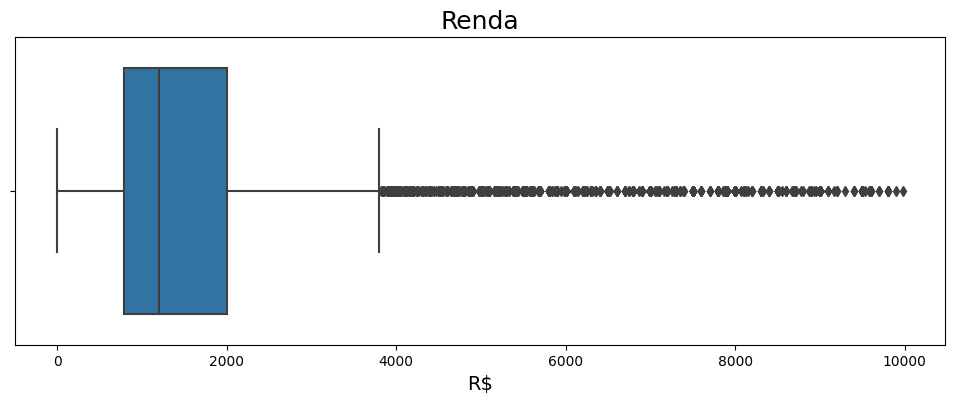

In [82]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

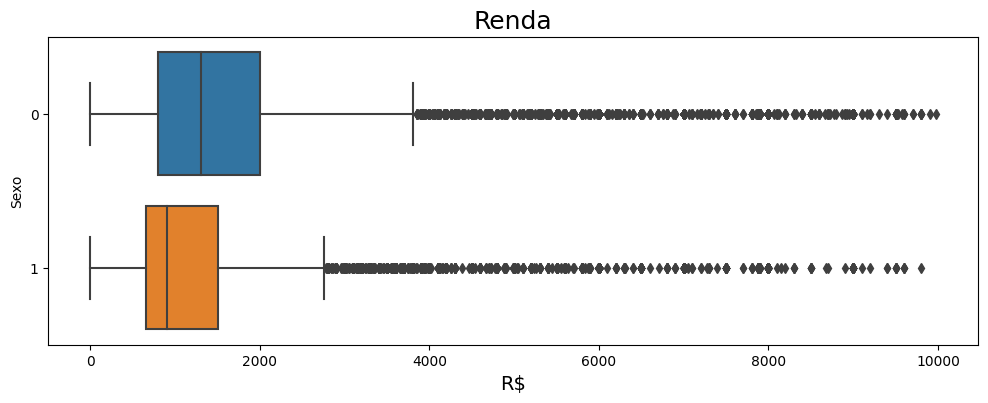

In [83]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos'>

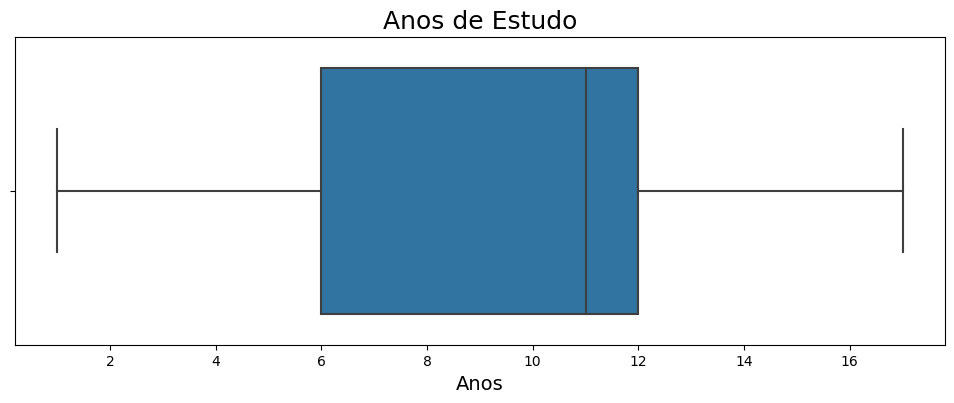

In [84]:
ax = sns.boxplot( x = 'Anos de Estudo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

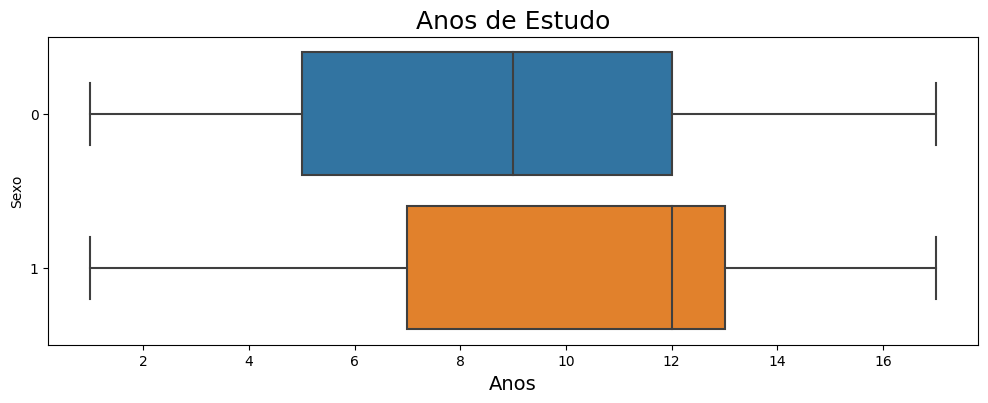

In [85]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

Medidas de dispersão

In [86]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [87]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [88]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [91]:
#desvio médio absoluto
notas_fulano=df[['Fulano']] #assim criamos um dataframe
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [92]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [93]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

/var/folders/1m/rncwt49n2pgf0m33c9wfrw7w0000gn/T/ipykernel_3956/349761232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [94]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [95]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


<Axes: >

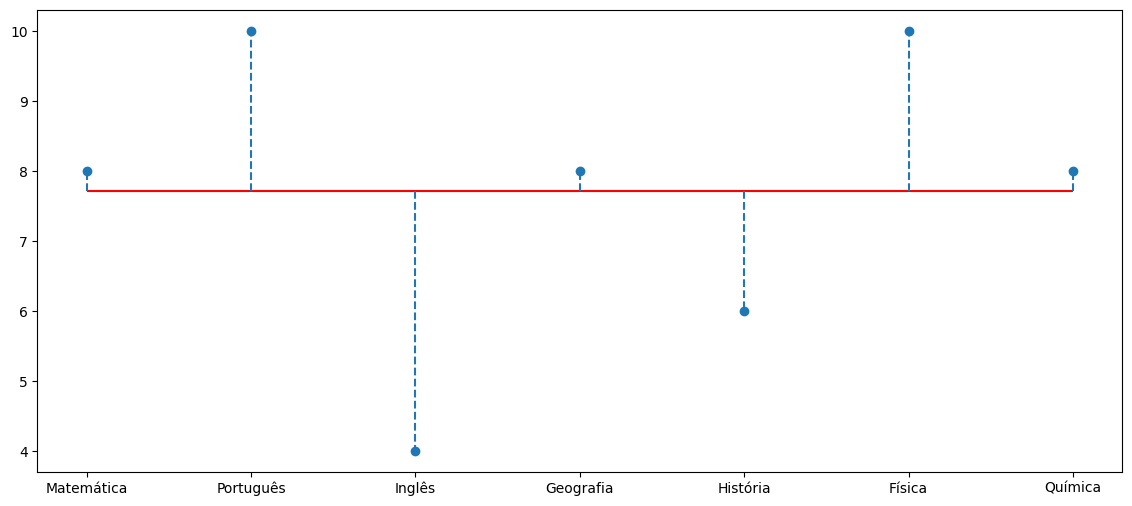

In [96]:
ax = notas_fulano['Fulano'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_fulano, xmin = 0, xmax = notas_fulano.shape[0] - 1, colors = 'red')
for i in range(notas_fulano.shape[0]):
    ax.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyle='dashed')
ax

In [107]:
notas_fulano['|Desvio|'].mean()
# o método .mad foi descontinuado, devendo ser calculado por meio de função específica, caso seja necessário.

1.5510204081632648

Exercício proposto - MEAN AVERAGE DEVIATION

In [108]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [119]:
boletim_fulano=df[['Fulano']] #criando o dataframe só com as notas de fulano
media_fulano=boletim_fulano['Fulano'].mean() #calculando a média de fulano
boletim_fulano['Desvio']=boletim_fulano['Fulano']-media_fulano #adicionando a diferença entre notas e média
boletim_fulano['|Desvio|']=boletim_fulano['Desvio'].abs() #Indicando a diferença absoluta
boletim_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [120]:
#calculando o mean average deviation
boletim_fulano['|Desvio|'].mean()

1.5510204081632648

In [124]:
boletim_sicrano=df[['Sicrano']] #criando o dataframe só com as notas de sicrano
media_sicrano=boletim_sicrano['Sicrano'].mean() #calculando a médica de sicrano
boletim_sicrano['Desvio']=boletim_sicrano['Sicrano']-media_sicrano #adicionando a coluna com a diferença entre as notas e média
boletim_sicrano['|Desvio|']=boletim_sicrano['Desvio'].abs()
boletim_sicrano

Matérias,Sicrano,Desvio,|Desvio|
Matemática,7.5,-0.214286,0.214286
Português,8.0,0.285714,0.285714
Inglês,7.0,-0.714286,0.714286
Geografia,8.0,0.285714,0.285714
História,8.0,0.285714,0.285714
Física,8.5,0.785714,0.785714
Química,7.0,-0.714286,0.714286


In [125]:
#calculando o mean average deviation
boletim_sicrano['|Desvio|'].mean()

0.4693877551020408

Variância

In [129]:
boletim_fulano['Desvioˆ2']=boletim_fulano['Desvio'].pow(2) #inseri uma nova coluna com os desvios elevados ao quadrado
boletim_fulano

Matérias,Fulano,Desvio,|Desvio|,Desvioˆ2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [131]:
variancia_calc=boletim_fulano['Desvioˆ2'].sum()/(len(boletim_fulano)-1) #calcula na mão o desvio amostral com o fator de correção de Bessel
variancia_calc

4.57142857142857

In [132]:
boletim_fulano['Fulano'].var() #aqui usa o método do Pandas para adiantar a vida

4.57142857142857

Desvio Padrão

In [137]:
np.sqrt(variancia_calc) #utilizando método do numpy

2.1380899352993947

In [138]:
desvio_padrao_fulano=boletim_fulano['Fulano'].std() #utilizando método do pandas
desvio_padrao_fulano

2.1380899352993947

Exercício proposto

In [150]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [151]:
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [154]:
dataset.describe()

,Idade
count,10.00000
mean,46.10000
std,14.18489
min,27.00000
25%,34.00000
50%,47.50000
75%,53.75000
max,72.00000


In [160]:
desvio_padra_mulheres=dataset.query("Sexo=='M'").Idade.std() #fazer um query realmente é mais fácil
#desviopadraoparamulheres=dataset.query("Sexo=='M'")[Idade].std ----- também faz o mesmo serviço
#desviopadraoparamulheres=dataset.groupby(['Sexo']).std().loc['M'] ----- também faz o mesmo serviço
desvio_padra_mulheres

16.64531966249572